In [4]:
import pandas as pd

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv("income.csv")


In [18]:
df.head()

,NAME,AGE,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [19]:
df

,NAME,AGE,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


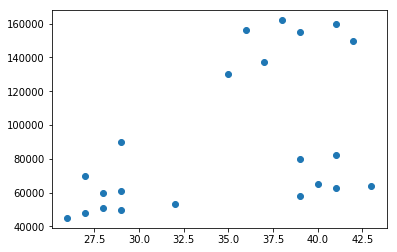

In [37]:
#can use either df.AGE OR df["AGE"]
plt.scatter(df["AGE"],df["Income($)"])

In [40]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
y_predict = km.fit_predict(df[['AGE','Income($)']])
y_predict

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [171]:
df['cluster'] = y_predict
#df.drop('income',axis =1,inplace =True)
#df.drop("incoe")
df.head()

,NAME,AGE,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [181]:

df1 = df[df['cluster'] ==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]

,NAME,AGE,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
11,Tom,0.000000,0.000000,0
12,Arnold,0.058824,0.025641,0
13,Jared,0.117647,0.051282,0
14,Stark,0.176471,0.038462,0
15,Ranbir,0.352941,0.068376,0


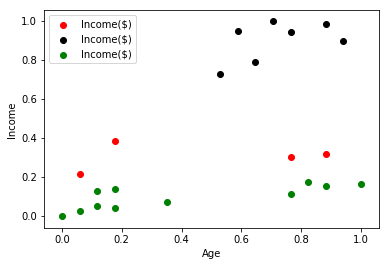

In [173]:
plt.scatter(df1["AGE"] ,df1["Income($)"],color = "red")
plt.scatter(df2["AGE"] ,df2["Income($)"], color = "black")
plt.scatter(df3["AGE"] ,df3["Income($)"], color ="green")

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [174]:
scaler = MinMaxScaler()
df["Income($)"] =  scaler.fit_transform (df[["Income($)"]])

df["AGE"]  = scaler.fit_transform(df[["AGE"]])


In [178]:
km = KMeans(n_clusters= 3)
y_predicted = km.fit_predict(df[["AGE","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [198]:
df["cluster"] = y_predicted
df

,NAME,AGE,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


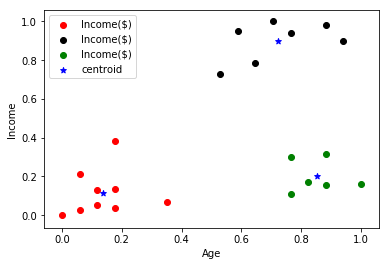

In [192]:
plt.scatter(df1["AGE"] ,df1["Income($)"],color = "red")
plt.scatter(df2["AGE"] ,df2["Income($)"], color = "black")
plt.scatter(df3["AGE"] ,df3["Income($)"], color ="green")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = "blue",marker="*",label = "centroid")
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [216]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters =k)
    km.fit(df[["AGE","Income($)"]])
    sse.append (km.inertia_) 
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.27980629310461785,
 0.22037641690770665,
 0.17978846893206757,
 0.13706529523670863,
 0.10383752586603559]

Text(0.5,0,'K')

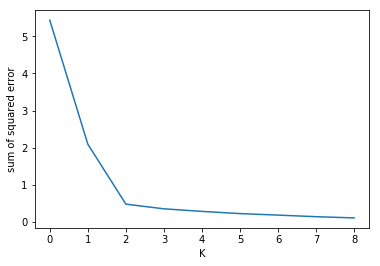

In [217]:
plt.plot(sse)
plt.ylabel("sum of squared error")
plt.xlabel("K")